In [7]:
#@title Exercice 5.1
import random

def creer_liste_aleatoire(n):
    nouvelle_liste = list(range(n))
    random.shuffle(nouvelle_liste)
    return nouvelle_liste

def creer_liste_croissante(n):
    nouvelle_liste = list(range(n))
    return nouvelle_liste

def est_triee_croissant(elements):
    for i in range(len(elements) -1 ):
        if elements[i] > elements[i+1]:
            return False
    return True

def introduire_doublons(elements, nombre):
    triee = est_triee_croissant(elements)
    for i in range(nombre):
        indice_a_copier = random.randint(0, len(elements) - 1)
        if triee:
            if indice_a_copier != len(elements) - 1:
                elements[indice_a_copier + 1] = elements[indice_a_copier]
            else:
                elements[indice_a_copier] = elements[indice_a_copier - 1]
        else:
            indice_cible = random.randint(0, len(elements) -1)
            while indice_a_copier == indice_cible:
                indice_cible = random.randint(0, len(elements) -1)
            elements[indice_cible] = elements[indice_a_copier]

def permuter_valeurs(elements, nombre):
    for i in range(nombre):
        i = random.randint(0, len(elements) - 1)
        j = random.randint(0, len(elements) - 1)
        while i == j:
            j = random.randint(0, len(elements) - 1)
        elements[i], elements[j] = elements[j], elements[i]

# Quelques tests

liste_triee = creer_liste_croissante(10)
print(liste_triee)
assert(est_triee_croissant(liste_triee))

liste_aleatoire = creer_liste_aleatoire(10)
print(liste_aleatoire)
assert(not est_triee_croissant(liste_aleatoire))

introduire_doublons(liste_triee, 3)
print(liste_triee)
assert(est_triee_croissant(liste_triee))

introduire_doublons(liste_aleatoire, 3)
print(liste_aleatoire)
assert(not est_triee_croissant(liste_aleatoire))

presque_triee = liste_triee.copy()
permuter_valeurs(presque_triee, 2)
print(presque_triee)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 6, 7, 3, 4, 1, 2, 0, 5, 8]
[0, 1, 1, 3, 4, 5, 6, 6, 8, 9]
[9, 3, 3, 3, 4, 1, 2, 0, 6, 8]
[0, 1, 1, 3, 4, 8, 6, 6, 5, 9]


In [8]:
#­@title Exercice 5.2

def tri_insertion(elements):
    for i in range(len(elements) - 1):
        j = i+1
        while j > 0 and elements[j] < elements[j-1]:
            elements[j], elements[j-1] = elements[j-1], elements[j]
            j = j -1

liste_aleatoire = creer_liste_aleatoire(1000)
assert(not est_triee_croissant(liste_aleatoire))
tri_insertion(liste_aleatoire)
if est_triee_croissant(liste_aleatoire):
    print("La liste est triée")
else:
    print("La liste n'est pas triée")

La liste est triée


In [9]:
#@title Exercice 5.3

def tri_selection(elements):
    for i in range(len(elements) - 1):
        plus_petit = i
        for j in range(i+1, len(elements)):
            if elements[j] < elements[plus_petit]:
                plus_petit = j
        if plus_petit != i:
            elements[plus_petit], elements[i] = elements[i], elements[plus_petit]

liste_aleatoire = creer_liste_aleatoire(1000)
assert(not est_triee_croissant(liste_aleatoire))
tri_insertion(liste_aleatoire)
if est_triee_croissant(liste_aleatoire):
    print("La liste est triée")
else:
    print("La liste n'est pas triée")

La liste est triée


In [10]:
#@title Exercice 5.4

def tri_rapide(elements):
    tri_rapide_recursif(elements, 0, len(elements)-1)

def tri_rapide_recursif(elements, gauche, droite):
    if gauche >= droite:
        return
    pivot = partitionner(elements, gauche, droite)
    tri_rapide_recursif(elements, gauche, pivot-1)
    tri_rapide_recursif(elements, pivot + 1, droite)


def partitionner(elements, gauche, droite):
    pivot_index = (gauche + droite) // 2
    pivot = elements[pivot_index]

    # on met le pivot à la fin
    elements[pivot_index], elements[droite] = elements[droite], elements[pivot_index]

    g = gauche
    d = droite - 1  # on commence avant le pivot qui est à droite

    while True:
        while g <= d and elements[g] < pivot:
            g += 1
        while g <= d and elements[d] > pivot:
            d -= 1

        if g >= d:  # quand les indices se croisent, on arrête
            break

        elements[g], elements[d] = elements[d], elements[g]
        g += 1
        d -= 1

    # on remet le pivot à sa bonne place
    elements[g], elements[droite] = elements[droite], elements[g]
    return g

liste_aleatoire = creer_liste_aleatoire(1000)
assert(not est_triee_croissant(liste_aleatoire))
tri_rapide(liste_aleatoire)
if est_triee_croissant(liste_aleatoire):
    print("La liste est triée")
else:
    print("La liste n'est pas triée")

La liste est triée


In [75]:
#@title Exercice 5.5

def fusionner(premier, deuxieme):
    i = 0
    j = 0
    fusion = []
    while i < len(premier) and j < len(deuxieme):
        if deuxieme[j] < premier[i]:          # important pour maintenire la stabilité. Si == alors on prend
            fusion.append(deuxieme[j])        # l'élément du premier tableau
            j += 1
        else:
            fusion.append(premier[i])
            i += 1

    for i in range(i, len(premier)):
        fusion.append(premier[i])

    for j in range(j, len(deuxieme)):
        fusion.append(deuxieme[j])

    return fusion

def tri_fusion(tableau):
    tableau_reponse = []
    if len(tableau) > 1:
        milieu = len(tableau) // 2
        gauche = tri_fusion(tableau[:milieu])
        droite = tri_fusion(tableau[milieu:])
        tableau_reponse = fusionner(gauche, droite)
    else:
        tableau_reponse = tableau
    return tableau_reponse

liste_aleatoire = creer_liste_aleatoire(1000)
assert(not est_triee_croissant(liste_aleatoire))
liste_aleatoire = tri_fusion(liste_aleatoire)
if est_triee_croissant(liste_aleatoire):
    print("La liste est triée")
else:
    print("La liste n'est pas triée")

La liste est triée


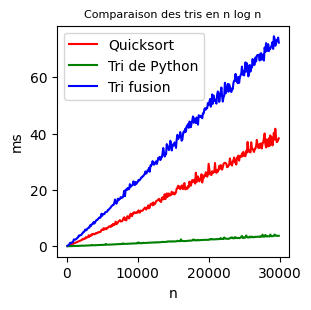

In [15]:
#@title Exercice 5.6

import matplotlib.pyplot as plt
import timeit

liste_x = list(range(100, 30000, 100))

quick_y = []
python_y = []
fusion_y = []

for x in liste_x:
    liste_originale = creer_liste_aleatoire(x)
    introduire_doublons(liste_originale, len(liste_originale) // 100)

    temps_copie = timeit.timeit(lambda: liste_originale.copy(), number=200) / 200 * 1000 # En ms

    temps = timeit.repeat(lambda: tri_rapide(liste_originale.copy()), number = 1, repeat = 1)
    quick_y.append(min(temps) * 1000 - temps_copie)

    temps = timeit.repeat(lambda: liste_originale.copy().sort(), number = 1, repeat = 1)
    python_y.append(min(temps) * 1000 - temps_copie)

    temps = timeit.repeat(lambda: tri_fusion(liste_originale.copy()), number = 1, repeat = 1)
    fusion_y.append(min(temps) * 1000 - temps_copie)

plt.figure(figsize=(3, 3))
plt.title("Comparaison des tris en n log n", fontsize=8)
plt.xlabel("n")
plt.ylabel("ms")

plt.plot(liste_x, quick_y, "-r", label="Quicksort")
plt.plot(liste_x, python_y, "-g", label="Tri de Python")
plt.plot(liste_x, fusion_y, "-b", label="Tri fusion")
plt.legend()
plt.show()

In [100]:
#@title Exercice 5.7

def fusionner(elements, gauche, milieu, droite, temp):
    i = gauche
    j = milieu
    k = gauche

    while i < milieu and j < droite:
        if elements[i] <= elements[j]:
            temp[k] = elements[i]
            i += 1
        else:
            temp[k] = elements[j]
            j += 1
        k += 1

    while i < milieu:
        temp[k] = elements[i]
        i += 1
        k += 1

    while j < droite:
        temp[k] = elements[j]
        j += 1
        k += 1
    
    for i in range(gauche, droite):
        elements[i] = temp[i]



def fusion_recursif(elements, gauche, droite, temp):
    if droite - gauche > 1:
        milieu = (gauche + droite) // 2
        fusion_recursif(elements, gauche, milieu, temp)
        fusion_recursif(elements, milieu, droite, temp)
        fusionner(elements, gauche, milieu, droite, temp)


def tri_fusion_opt(elements):
    temp = [None] * len(elements)   # Pour fusionner les éléments
    fusion_recursif(elements, 0, len(elements), temp)


liste = creer_liste_aleatoire(10)
tri_fusion_opt(liste)
print(liste)

# liste_aleatoire = creer_liste_aleatoire(1000)
# assert(not est_triee_croissant(liste_aleatoire))
# tri_fusion_opt(liste_aleatoire)
# if est_triee_croissant(liste_aleatoire):
#     print("La liste est triée")
# else:
#     print("La liste n'est pas triée")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
